In [1]:
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 

Using TensorFlow backend.


In [20]:
img_width, img_height = 224, 224
  
train_data_dir = 'C:/Web_Scrapping/fliprobo assignment 2/Train'
validation_data_dir = 'C:/Web_Scrapping/fliprobo assignment 2/Test'
nb_train_samples = 80
nb_validation_samples = 20
epochs = 10
batch_size = 16

In [3]:
if K.image_data_format() == 'channels_first': 
    input_shape = (3, img_width, img_height) 
else: 
    input_shape = (img_width, img_height, 3) 

In [4]:
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape = input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 

In [5]:
model.compile(loss ='binary_crossentropy', 
                     optimizer ='rmsprop', 
                   metrics =['accuracy']) 

In [6]:
train_datagen = ImageDataGenerator( 
                rescale = 1. / 255, 
                 shear_range = 0.2, 
                  zoom_range = 0.2, 
            horizontal_flip = True) 

In [7]:
test_datagen = ImageDataGenerator(rescale = 1. / 255) 

In [13]:
train_generator = train_datagen.flow_from_directory(train_data_dir, 
                              target_size =(img_width, img_height), 
                     batch_size = batch_size, class_mode ='binary') 
  


Found 80 images belonging to 2 classes.


In [14]:
validation_generator = test_datagen.flow_from_directory( 
                                    validation_data_dir, 
                   target_size =(img_width, img_height), 
          batch_size = batch_size, class_mode ='binary') 

Found 20 images belonging to 2 classes.


In [15]:
model_save = model.fit_generator(train_generator, 
        steps_per_epoch = nb_train_samples // batch_size, 
        epochs = epochs, validation_data = validation_generator, 
        validation_steps = nb_validation_samples // batch_size) 
  

Epoch 1/10
5/5 [==============================] - 9s 2s/step - loss: 2.9413 - accuracy: 0.4875 - val_loss: 0.8312 - val_accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 4s 711ms/step - loss: 0.8248 - accuracy: 0.5250 - val_loss: 0.7065 - val_accuracy: 0.5000
Epoch 3/10
5/5 [==============================] - 4s 861ms/step - loss: 0.6728 - accuracy: 0.5625 - val_loss: 0.6848 - val_accuracy: 0.4375
Epoch 4/10
5/5 [==============================] - 4s 833ms/step - loss: 0.6378 - accuracy: 0.6375 - val_loss: 0.9736 - val_accuracy: 0.5000
Epoch 5/10
5/5 [==============================] - 4s 868ms/step - loss: 0.6335 - accuracy: 0.6625 - val_loss: 0.7563 - val_accuracy: 0.4375
Epoch 6/10
5/5 [==============================] - 4s 768ms/step - loss: 0.5978 - accuracy: 0.7500 - val_loss: 0.4679 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 4s 899ms/step - loss: 0.5521 - accuracy: 0.7125 - val_loss: 0.7581 - val_accuracy: 0.5000
Epoch 8/10
5/5 [=======

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


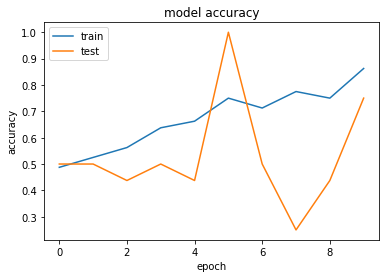

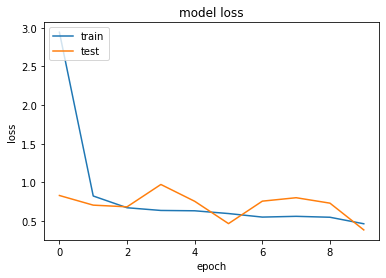

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(model_save.history.keys())
# summarize history for accuracy
plt.plot(model_save.history['accuracy'])
plt.plot(model_save.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_save.history['loss'])
plt.plot(model_save.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
from skimage import io

def imshow(image_RGB):
    io.imshow(image_RGB)
    io.show()


16
0.0


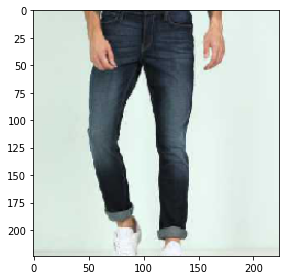

1.0


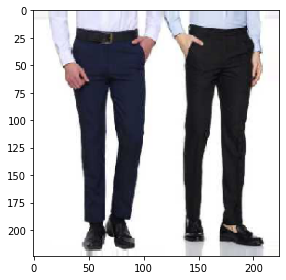

0.0


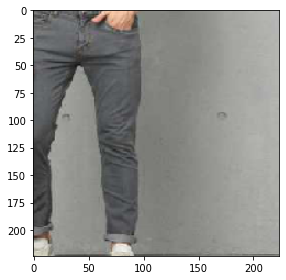

1.0


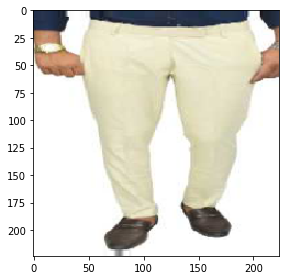

0.0


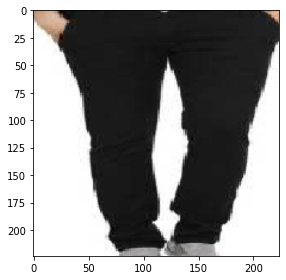

0.0


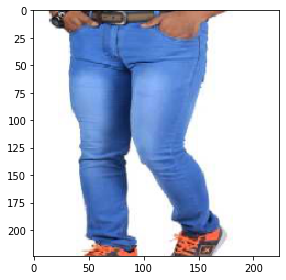

0.0


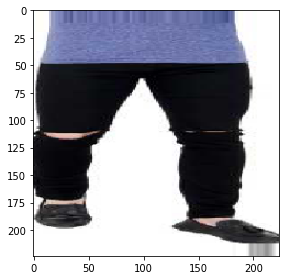

1.0


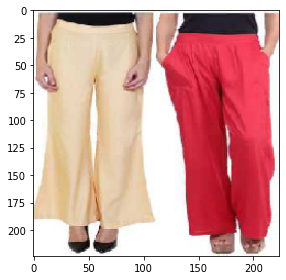

0.0


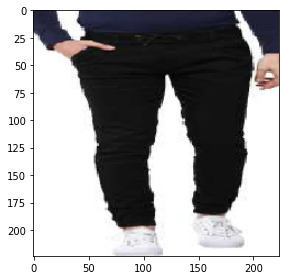

1.0


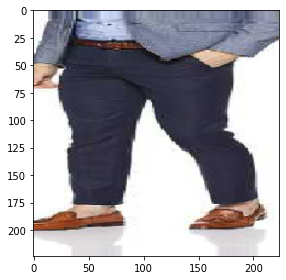

1.0


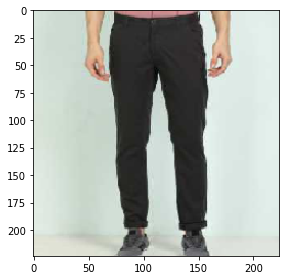

1.0


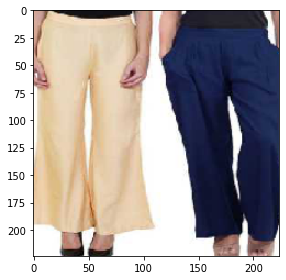

1.0


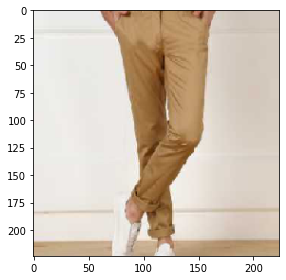

1.0


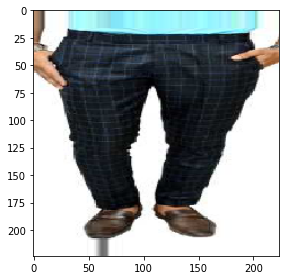

1.0


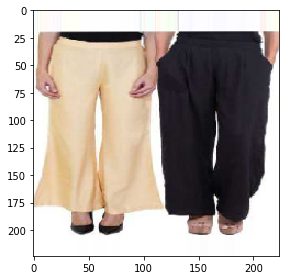

0.0


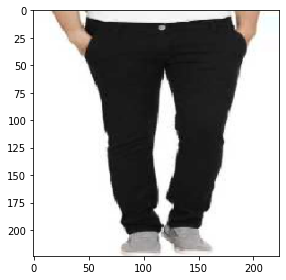

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [25]:
from os import listdir
from os.path import isfile, join
predict_dir_path='C:/Web_Scrapping/fliprobo assignment 2/Test_perdict/'
output_files = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(output_files)

['img_10.jpeg', 'img_15.jpeg', 'img_215.jpeg', 'img_227.jpeg', 'img_230.jpeg', 'img_321.jpeg', 'img_322.jpeg', 'img_326.jpeg', 'img_34.jpeg', 'img_41.jpeg']


In [28]:
import numpy as np
from keras.preprocessing import image
jean_counter = 0 
trouser_counter  = 0
for file in output_files:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 1:
        print(file + ": " + 'trouser')
        jean_counter += 1
    else:
        print(file + ": " + 'jeans')
        trouser_counter += 1
print("Total jeans :", jean_counter)
print("Total trousers :",trouser_counter)


img_10.jpeg: jeans
img_15.jpeg: jeans
img_215.jpeg: trouser
img_227.jpeg: jeans
img_230.jpeg: jeans
img_321.jpeg: trouser
img_322.jpeg: trouser
img_326.jpeg: jeans
img_34.jpeg: trouser
img_41.jpeg: trouser
Total jeans : 5
Total trousers : 5


In [27]:
model.save_weights('model_saved.h6') 